In [53]:
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [54]:
data_df = pd.read_csv('data/AmesHousing.csv')
data_df = data_df.select_dtypes(include=["int64", "float64"])

data_df.drop(columns=['PID'], inplace=True)
data_df.dropna(axis=0, inplace=True)

target = data_df.pop('SalePrice')
data_df

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,1,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,528.0,210,62,0,0,0,0,0,5,2010
1,2,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
2,3,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
3,4,20,93.0,11160,7,5,1968,1968,0.0,1065.0,...,522.0,0,0,0,0,0,0,0,4,2010
4,5,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2924,20,80.0,17400,5,5,1977,1977,0.0,936.0,...,484.0,295,41,0,0,0,0,0,5,2006
2924,2925,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
2925,2926,80,37.0,7937,6,6,1984,1984,0.0,819.0,...,588.0,120,0,0,0,0,0,0,3,2006
2928,2929,20,77.0,10010,5,5,1974,1975,0.0,1071.0,...,418.0,240,38,0,0,0,0,0,4,2006


# Dimensionality reduction

## 1 PCA

Text(0, 0.5, 'Explained variance ratio')

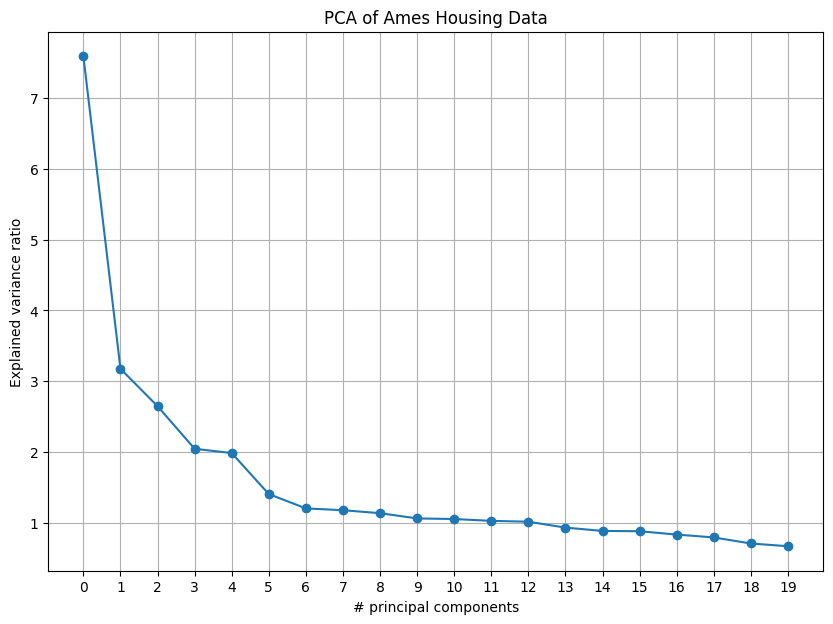

In [55]:
pca = PCA(n_components=20)
x = StandardScaler().fit_transform(data_df)
pca.fit(x)
plt.figure(figsize=(10, 7))
plt.title('PCA of Ames Housing Data')
plt.plot(pca.explained_variance_, marker='o')
plt.xticks(np.arange(0, 20, 1))
plt.grid()
plt.xlabel('# principal components')
plt.ylabel('Explained variance ratio')


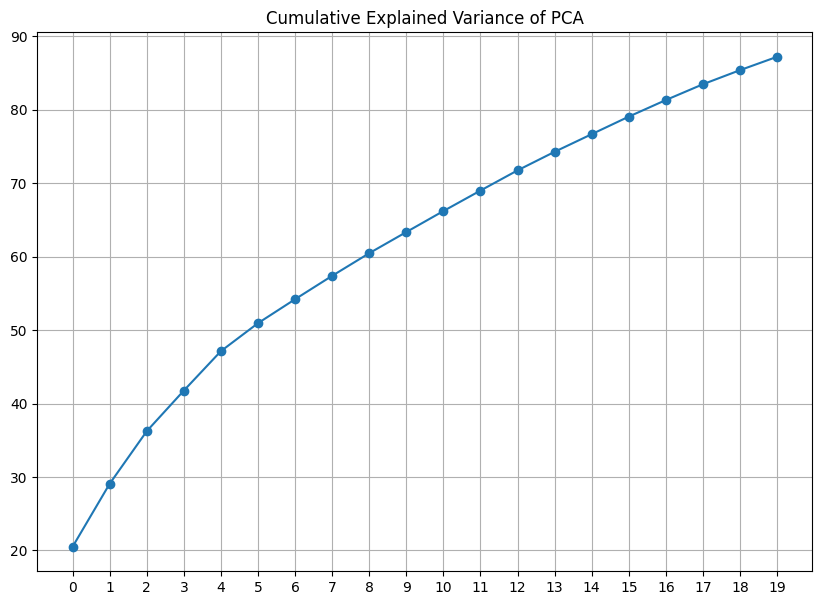

In [56]:
variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(np.round(variance, decimals=4) * 100)
plt.figure(figsize=(10, 7))
plt.title('Cumulative Explained Variance of PCA')
plt.plot(cumulative_variance, marker='o')
plt.xticks(np.arange(0, 20, 1))
plt.grid()

In [58]:
print(x.shape)
data_df = pd.DataFrame(data=x[:,:17], columns=[f'PC{i+1}' for i in range(17)])
data_df['target'] = target

# data_df.to_csv('data/processed_data.csv', index=False)
data_df

(2274, 37)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,target
0,-1.720944,-0.864980,3.050151,3.363656,-0.127095,-0.538983,-0.390011,-1.176696,0.036435,0.426967,-0.295998,-0.306068,0.030573,1.242756,-0.789814,-0.092096,0.304256,215000.0
1,-1.719770,-0.864980,0.438963,0.276114,-0.830292,0.399491,-0.357509,-1.129418,-0.572458,0.059964,0.569988,-0.690806,-0.411778,-0.679832,-0.789814,-0.092096,-1.210462,105000.0
2,-1.718596,-0.864980,0.481769,0.681442,-0.127095,0.399491,-0.455015,-1.271251,0.014689,1.036494,-0.295998,-0.384816,0.586863,0.415537,-0.789814,-0.092096,-0.347472,172000.0
3,-1.717422,-0.864980,0.995446,0.205316,0.576102,-0.538983,-0.129994,-0.798477,-0.572458,1.341257,-0.295998,1.052888,2.331691,2.391250,-0.789814,-0.092096,1.209100,244000.0
4,-1.716248,0.082898,0.182125,0.614475,-0.830292,-0.538983,0.812567,0.619845,-0.572458,0.753193,-0.295998,-0.990046,-0.309009,-0.598881,0.864826,-0.092096,0.250443,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,1.710733,-0.864980,0.438963,1.161553,-0.830292,-0.538983,0.162525,-0.372980,-0.572458,1.064395,-0.295998,-0.870800,0.133341,-0.097996,-0.789814,-0.092096,-0.752061,282000.0
2270,1.711907,-0.864980,3.863472,1.559985,-0.830292,1.337965,-0.390011,0.525291,-0.572458,1.682506,-0.295998,-1.298286,0.352283,0.149917,-0.789814,-0.092096,-0.556742,NaN
2271,1.713081,0.556836,-1.401711,-0.288587,-0.127095,0.399491,0.390040,-0.042038,-0.572458,0.813287,-0.295998,-0.884299,-0.141452,-0.409152,-0.789814,-0.092096,-0.997206,270000.0
2272,1.716603,-0.864980,0.310544,0.029086,-0.830292,-0.538983,0.065018,-0.467535,-0.572458,1.354134,0.443699,-0.859550,0.720908,0.567321,-0.789814,-0.092096,-0.227889,NaN
